In [490]:
# # !pip3 install setuptools
# !pip install pycaret
# !pip install missingno


In [555]:
import json
from tqdm import tqdm
# import cloudscraper
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import datetime
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# from pycaret.regression import setup, compare_models,evaluate_model,predict_model,save_model
pd.set_option('display.float_format', '{:.6f}'.format)

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [492]:
df_raw= pd.read_csv('data.csv')

In [493]:
df_raw.head()

,ad_id,list_id,list_time,date,account_id,account_oid,account_name,state,subject,body,category,category_name,area,area_name,region,region_name,company_ad,type,price,price_string,image,webp_image,videos,number_of_images,avatar,rooms,property_legal_document,size,region_v2,area_v2,ward,ward_name,price_million_per_m2,house_type,contain_videos,location,longitude,latitude,phone_hidden,owner,protection_entitlement,escrow_can_deposit,params,zero_deposit,street_name,pty_jupiter,label_campaigns,ad_labels,pty_characteristics,seller_info.full_name,seller_info.avatar,seller_info.sold_ads,seller_info.live_ads,has_video,company_logo,land_type,streetnumber_display,width,length,toilets,floors,orig_list_time,furnishing_sell,living_size,special_display_images,special_display,commercial_type,detail_address,direction,apartment_type,property_status,street_number,projectid,project_oid,projectimages,block,floornumber,balconydirection,unitnumber,apartment_feature,unitnumber_display,shop_alias,shop.alias,shop.status,shop.name,shop.address,shop.profileImageUrl,shop.createdDate,shop.modifiedDate,shop.urls,shop.shopsCategoriesRelationships,address,property_road_condition,property_back_condition,size_unit,street_id,land_feature
0,153400852,112848721,1712249766000,15 phút trước,23093184,9757fd9ebb02faa9e6710e5b721bb42c,Lương Thị Đức Hậu,accepted,Bán nhà dân xây phố Kẻ Tạnh-Việt Hưng-38m2-4tầ...,"Cần bán nhà 4 tầng, 38m2, mt 4m, tự xây kiên c...",1020,Nhà ở,81,Quận Long Biên,12,Hà Nội,True,s,3290000000,"3,29 tỷ",https://cdn.chotot.com/c9TntuXKz0jz3yUKBt9T-eg...,https://cdn.chotot.com/XvpQYcN0Bd1fwmUQqXba95n...,[],3.000,https://cdn.chotot.com/uac2/23093184,4.000,1.000,38.000,12000,12081,43,Phường Giang Biên,86.579,3.000,2,"21.0557,105.9085",105.909,21.056,True,False,False,2,"[{'id': 'size', 'value': '38 m²', 'label': 'Di...",False,Việt Hưng,0,NaN,NaN,[3],NaN,NaN,0,0,NaN,NaN,NaN,NaN,4.000,9.500,4.000,4.000,NaN,2.000,112.000,['https://cdn.chotot.com/3ZS_ER10YS1jjXdJm8CdQ...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156221470,115266058,1712249597259,17 phút trước,26816952,18e0aa380bfcfcc741e975d528ba24f7,Nguyễn Lam,accepted,CCMN kinh doanh 33 căn hộ khép kín gác lửng 14...,✅DÒNG TIỀN 2.4 TỶ/ NĂM - DT 146M XD 8 TẦNG TH...,1020,Nhà ở,78,Quận Tây Hồ,12,Hà Nội,False,s,24000000000,24 tỷ,https://cdn.chotot.com/NyLtSh0w9hM-m6OJvfRfNe1...,https://cdn.chotot.com/79kCj7QrBTNmnqTNy-QCGKj...,[],8.000,https://cdn.chotot.com/uac2/26816952,11.000,1.000,146.000,12000,12078,37,Phường Xuân La,164.384,1.000,2,"21.065,105.8098",105.810,21.065,True,False,False,2,"[{'id': 'size', 'value': '146 m²', 'label': 'D...",False,Đường Lạc Long Quân,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000,1712249310000.000,2.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,156221612,115266086,1712249495000,19 phút trước,20980923,1c58aacaec12d253e135a4da158ec9cf,Đoàn Sang,accepted,"Bán nhà Trần Quốc Vượng, mới tinh, ngõ oto nhỏ...",BÁN NHÀ TRẦN QUỐC VƯỢNG – MỚI TINH – THOÁNG ĐẸ...,1020,Nhà ở,79,Quận Cầu Giấy,12,Hà Nội,False,s,6250000000,"6,25 tỷ",https://cdn.chotot.com/zL3c02rQDDJcTb50CGJZgXl...,https://cdn.chotot.com/KjMDIClFhDk7XZxSNnbHf0P...,[],5.000,https://cdn.chotot.com/uac2/20980923,4.000,1.000,34.000,12000,12079,59,Phường Dịch Vọng Hậu,183.824,3.000,2,"21.0344,105.784",105.784,21.034,True,False,False,2,"[{'id': 'size', 'value': '34 m²', 'label': 'Di...",False,Phố Trần Quốc Vượng,0,NaN,NaN,"[2, 3]",NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,4.000,6.000,NaN,1.000,34.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,156221609,115266083,1712249462000,20 phút trước,24530990,362d35ffbfaacf773f26dd209afb8967,Xinh Hue,accepted,BÁN NHÀ TT VŨ THẠNH 90M*3PN*2VS 3.5 tỷ,💥💥 SIÊU PHẨM NHÀ ĐẸP- NỘI THẤT XỊN\n\n🏯NHÀ RẤ...,1010,Căn hộ/Chung 

In [494]:
df_raw.columns.to_list()

['ad_id',
 'list_id',
 'list_time',
 'date',
 'account_id',
 'account_oid',
 'account_name',
 'state',
 'subject',
 'body',
 'category',
 'category_name',
 'area',
 'area_name',
 'region',
 'region_name',
 'company_ad',
 'type',
 'price',
 'price_string',
 'image',
 'webp_image',
 'videos',
 'number_of_images',
 'avatar',
 'rooms',
 'property_legal_document',
 'size',
 'region_v2',
 'area_v2',
 'ward',
 'ward_name',
 'price_million_per_m2',
 'house_type',
 'contain_videos',
 'location',
 'longitude',
 'latitude',
 'phone_hidden',
 'owner',
 'protection_entitlement',
 'escrow_can_deposit',
 'params',
 'zero_deposit',
 'street_name',
 'pty_jupiter',
 'label_campaigns',
 'ad_labels',
 'pty_characteristics',
 'seller_info.full_name',
 'seller_info.avatar',
 'seller_info.sold_ads',
 'seller_info.live_ads',
 'has_video',
 'company_logo',
 'land_type',
 'streetnumber_display',
 'width',
 'length',
 'toilets',
 'floors',
 'orig_list_time',
 'furnishing_sell',
 'living_size',
 'special_display_

#### Data cleaning


In [495]:
df_raw = df_raw.drop(columns=['pty_characteristics','price_million_per_m2','shop_alias','date' ,'shop.alias', 'shop.status', 'shop.name', 'shop.address', 'shop.profileImageUrl', 'shop.createdDate', 'shop.modifiedDate', 'shop.urls', 'shop.shopsCategoriesRelationships', 'ad_id', 'list_id',  'account_id', 'account_oid', 'account_name', 'image', 'webp_image', 'videos', 'number_of_images', 'avatar', 'seller_info.full_name', 'seller_info.avatar', 'seller_info.sold_ads', 'seller_info.live_ads', 'has_video', 'company_logo', 'special_display_images', 'special_display', 'state', 'land_feature', 'street_id', 'size_unit', 'property_back_condition', 'property_road_condition', 'unitnumber_display', 'projectimages', 'project_oid', 'projectid', 'orig_list_time', 'streetnumber_display', 'ad_labels', 'label_campaigns', 'pty_jupiter', 'zero_deposit', 'escrow_can_deposit', 'protection_entitlement', 'owner', 'phone_hidden', 'contain_videos', 'type', 'params', 'address', 'location', 'longitude', 'latitude', 'company_ad', 'category', 'area', 'region','body', 'region_v2', 'area_v2', 'ward'], axis=1)

In [496]:
df_raw.drop(columns=['list_time','subject','price_string','ward_name','street_name'],inplace=True)

In [497]:
df_raw.rename(columns={
    'subject': 'TenBds',
    'category_name':'TheLoai',
    'area_name':'Huyen',
    'region_name':'Tinh',
    'price':'Gia',
    'rooms':'TongSoPhong',
    'property_legal_document':'GiayTo',
    'ward_name':'Phuong/Xa',
    'price_million_per_m2':'Gia/m2',
    'house_type':'LoaiHinhNhaO',
    'land_type':'LoaiHinhDat',
    'width':'ChieuNgang',
    'length':'ChieuDai',
    'toilets':'PhongVeSinh',
    'floors':'SoTang',
    'furnishing_sell':'NoiThat',
    'living_size':'DienTichSuDung',
    'commercial_type':'LoaiHinhVanPhong',
    'detail_address':'TenDuongCuThe',
    'direction':'HuongCuaChinh',
    'apartment_type':'LoaiHinhCanHo',
    'property_status':'TinhTrangBds',
    'street_number':'SoDuong',
    'block': 'TenPhanKhu/Lo/Block/Thap',
    'floornumber':'TangSo',
    'balconydirection':'HuongBanCong',
    'unitnumber':'MaLo',
    'apartment_feature':'DacDiemCanHoChungCu',
    'size':'DienTich(m2)',
    'street_name':'TenDuong'
    }, inplace=True)

In [498]:
df_raw.loc[df_raw['GiayTo']==1.0,['GiayTo']]='Đã có sổ'
df_raw.loc[df_raw['GiayTo']==2.0,['GiayTo']]='Đang chờ sổ'
df_raw.loc[df_raw['GiayTo']==3.0,['GiayTo']]='Giấy tờ khác'
df_raw.loc[df_raw['GiayTo']==4.0,['GiayTo']]='Hợp đồng đặt cọc'
df_raw.loc[df_raw['GiayTo']==5.0,['GiayTo']]='Sổ chung'
df_raw.loc[df_raw['GiayTo']==6.0,['GiayTo']]='Sổ hồng riêng'

df_raw.loc[df_raw['LoaiHinhNhaO']==1.0,['LoaiHinhNhaO']]='Nhà mặt phố, mặt tiền'
df_raw.loc[df_raw['LoaiHinhNhaO']==2.0,['LoaiHinhNhaO']]='Nhà ngõ, hẻm'
df_raw.loc[df_raw['LoaiHinhNhaO']==3.0,['LoaiHinhNhaO']]='Nhà phố liền kề'
df_raw.loc[df_raw['LoaiHinhNhaO']==4.0,['LoaiHinhNhaO']]='Nhà biệt thự'

df_raw.loc[df_raw['NoiThat']==1.0,['NoiThat']]='Noi That cao cấp'
df_raw.loc[df_raw['NoiThat']==2.0,['NoiThat']]='Noi That đầy đủ'
df_raw.loc[df_raw['NoiThat']==3.0,['NoiThat']]='Hoàn thiện cơ bản'
df_raw.loc[df_raw['NoiThat']==4.0,['NoiThat']]='Bàn giao thô'

df_raw.loc[df_raw['LoaiHinhVanPhong']==1.0,['LoaiHinhVanPhong']]='Shophouse'
df_raw.loc[df_raw['LoaiHinhVanPhong']==2.0,['LoaiHinhVanPhong']]='Officetel'
df_raw.loc[df_raw['LoaiHinhVanPhong']==3.0,['LoaiHinhVanPhong']]='Văn phòng'
df_raw.loc[df_raw['LoaiHinhVanPhong']==4.0,['LoaiHinhVanPhong']]='Mặt bằng kinh doanh'

df_raw.loc[df_raw['HuongCuaChinh']==1.0,['HuongCuaChinh']]='Đông'
df_raw.loc[df_raw['HuongCuaChinh']==2.0,['HuongCuaChinh']]='Tây'
df_raw.loc[df_raw['HuongCuaChinh']==3.0,['HuongCuaChinh']]='Nam'
df_raw.loc[df_raw['HuongCuaChinh']==4.0,['HuongCuaChinh']]='Bắc'
df_raw.loc[df_raw['HuongCuaChinh']==5.0,['HuongCuaChinh']]='Đông Bắc'
df_raw.loc[df_raw['HuongCuaChinh']==6.0,['HuongCuaChinh']]='Đông Nam'
df_raw.loc[df_raw['HuongCuaChinh']==7.0,['HuongCuaChinh']]='Tây Bắc'
df_raw.loc[df_raw['HuongCuaChinh']==8.0,['HuongCuaChinh']]='Tây Nam'

df_raw.loc[df_raw['HuongBanCong']==1.0,['HuongBanCong']]='Đông'
df_raw.loc[df_raw['HuongBanCong']==2.0,['HuongBanCong']]='Tây'
df_raw.loc[df_raw['HuongBanCong']==3.0,['HuongBanCong']]='Nam'
df_raw.loc[df_raw['HuongBanCong']==4.0,['HuongBanCong']]='Bắc'
df_raw.loc[df_raw['HuongBanCong']==5.0,['HuongBanCong']]='Đông Bắc'
df_raw.loc[df_raw['HuongBanCong']==6.0,['HuongBanCong']]='Đông Nam'
df_raw.loc[df_raw['HuongBanCong']==7.0,['HuongBanCong']]='Tây Bắc'
df_raw.loc[df_raw['HuongBanCong']==8.0,['HuongBanCong']]='Tây Nam'

df_raw.loc[df_raw['LoaiHinhCanHo']==1.0,['LoaiHinhCanHo']]='Chung cư'
df_raw.loc[df_raw['LoaiHinhCanHo']==2.0,['LoaiHinhCanHo']]='Căn hộ dịch vụ, mini'
df_raw.loc[df_raw['LoaiHinhCanHo']==3.0,['LoaiHinhCanHo']]='Duplex'
df_raw.loc[df_raw['LoaiHinhCanHo']==4.0,['LoaiHinhCanHo']]='Penthouse'
df_raw.loc[df_raw['LoaiHinhCanHo']==5.0,['LoaiHinhCanHo']]='Tập thể, cư xá'
df_raw.loc[df_raw['LoaiHinhCanHo']==6.0,['LoaiHinhCanHo']]='Officetel'

df_raw.loc[df_raw['TinhTrangBds']==1.0,['TinhTrangBds']]='Chưa bàn giao'
df_raw.loc[df_raw['TinhTrangBds']==2.0,['TinhTrangBds']]='Đã bàn giao'

df_raw.loc[df_raw['LoaiHinhDat']==1.0,['LoaiHinhDat']]='Đất thổ cư'
df_raw.loc[df_raw['LoaiHinhDat']==2.0,['LoaiHinhDat']]='Đất nền dự án'
df_raw.loc[df_raw['LoaiHinhDat']==3.0,['LoaiHinhDat']]='Đất nông nghiệp'
df_raw.loc[df_raw['LoaiHinhDat']==4.0,['LoaiHinhDat']]='Đất công nghiệp'

df_raw.loc[df_raw['DacDiemCanHoChungCu']==1.0,['DacDiemCanHoChungCu']]='Căn góc'


/tmp/ipykernel_71654/3094607576.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Đã có sổ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.loc[df_raw['GiayTo']==1.0,['GiayTo']]='Đã có sổ'
/tmp/ipykernel_71654/3094607576.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nhà mặt phố, mặt tiền' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.loc[df_raw['LoaiHinhNhaO']==1.0,['LoaiHinhNhaO']]='Nhà mặt phố, mặt tiền'
/tmp/ipykernel_71654/3094607576.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Noi That cao cấp' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.loc[df_raw['NoiThat']==1.0,['NoiThat']]='Noi That cao cấp'
/tmp

In [499]:
# for i in df_raw.columns:
#     print(df_raw[i].value_counts().index.to_list())

In [500]:
for i in df_raw.columns:
    print(df_raw[i].value_counts())

TheLoai
Nhà ở                             26542
Đất                                7629
Căn hộ/Chung cư                    6195
Văn phòng, Mặt bằng kinh doanh      487
Phòng trọ                             1
Name: count, dtype: int64
Huyen
Thành phố Thủ Đức    3337
Quận 12              1987
Quận Bình Tân        1803
Quận Hoàng Mai       1725
Quận Đống Đa         1654
Quận Gò Vấp          1557
Quận Ngũ Hành Sơn    1377
Quận Tân Phú         1352
Quận Cầu Giấy        1331
Quận Liên Chiểu      1314
Quận Cẩm Lệ          1257
Quận 7               1211
Quận Bình Thạnh      1209
Quận Hà Đông         1134
Quận Tân Bình        1041
Huyện Bình Chánh     1025
Quận Sơn Trà         1007
Quận Thanh Xuân       996
Quận Long Biên        968
Quận Nam Từ Liêm      957
Quận Hai Bà Trưng     865
Quận Hải Châu         826
Quận 8                812
Quận Ba Đình          765
Huyện Hóc Môn         764
Quận Thanh Khê        723
Huyện Nhà Bè          648
Huyện Gia Lâm         587
Huyện Củ Chi          575
Huyện 

In [501]:
df_raw.head(5)

,TheLoai,Huyen,Tinh,Gia,TongSoPhong,GiayTo,DienTich(m2),LoaiHinhNhaO,LoaiHinhDat,ChieuNgang,ChieuDai,PhongVeSinh,SoTang,NoiThat,DienTichSuDung,LoaiHinhVanPhong,TenDuongCuThe,HuongCuaChinh,LoaiHinhCanHo,TinhTrangBds,SoDuong,TenPhanKhu/Lo/Block/Thap,TangSo,HuongBanCong,MaLo,DacDiemCanHoChungCu
0,Nhà ở,Quận Long Biên,Hà Nội,3290000000,4.000,Đã có sổ,38.000,Nhà phố liền kề,NaN,4.000,9.500,4.000,4.000,Noi That đầy đủ,112.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nhà ở,Quận Tây Hồ,Hà Nội,24000000000,11.000,Đã có sổ,146.000,"Nhà mặt phố, mặt tiền",NaN,NaN,NaN,NaN,8.000,Noi That đầy đủ,NaN,NaN,NaN,Đông,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nhà ở,Quận Cầu Giấy,Hà Nội,6250000000,4.000,Đã có sổ,34.000,Nhà phố liền kề,NaN,NaN,NaN,4.000,6.000,Noi That cao cấp,34.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Căn hộ/Chung cư,Quận Đống Đa,Hà Nội,3500000000,3.000,Sổ hồng riêng,90.000,NaN,NaN,NaN,NaN,2.000,NaN,Noi That cao cấp,NaN,NaN,NaN,NaN,"Tập thể, cư xá",Đã bàn giao,NaN,NaN,NaN,NaN,NaN,NaN
4,Nhà ở,Quận Ba Đình,Hà Nội,7200000000,4.000,Đã có sổ,55.000,Nhà phố liền kề,NaN,NaN,NaN,3.000,4.000,Noi That cao cấp,55.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [502]:
df_raw.select_dtypes(['object']).describe()

,TheLoai,Huyen,Tinh,GiayTo,LoaiHinhNhaO,LoaiHinhDat,NoiThat,LoaiHinhVanPhong,TenDuongCuThe,HuongCuaChinh,LoaiHinhCanHo,TinhTrangBds,SoDuong,TenPhanKhu/Lo/Block/Thap,HuongBanCong,MaLo,DacDiemCanHoChungCu
count,40854,40853,40854,39074,26542,7629,18543,487,5255,11181,6195,6195,5351,2100,1650,1583,1162
unique,5,59,3,6,4,4,4,4,1413,8,6,2,2650,1273,8,822,1
top,Nhà ở,Thành phố Thủ Đức,Tp Hồ Chí Minh,Đã có sổ,Nhà phố liền kề,Đất thổ cư,Noi That đầy đủ,Mặt bằng kinh doanh,"Xã Đa Tốn, Kiêu Kỵ, Dương Xá và một phần thị t...",Đông Nam,Chung cư,Đã bàn giao,số 88,A,Đông Nam,1,Căn góc
freq,26542,3337,19798,33006,17279,6554,9035,384,377,2357,5517,4892,150,152,616,83,1162


In [519]:
df_c = df_raw.copy()


In [534]:
fr =df_c.copy()
# fr['log_price']=np.log1p(fr['Giá'])
def scatt(x,fig):
    plt.subplot(5,3,fig)
    # plt.scatter(fr[x],fr['log_price'])
    plt.scatter(fr[x],fr['Gia'])
    plt.xlabel(x)
    plt.ylabel('price')

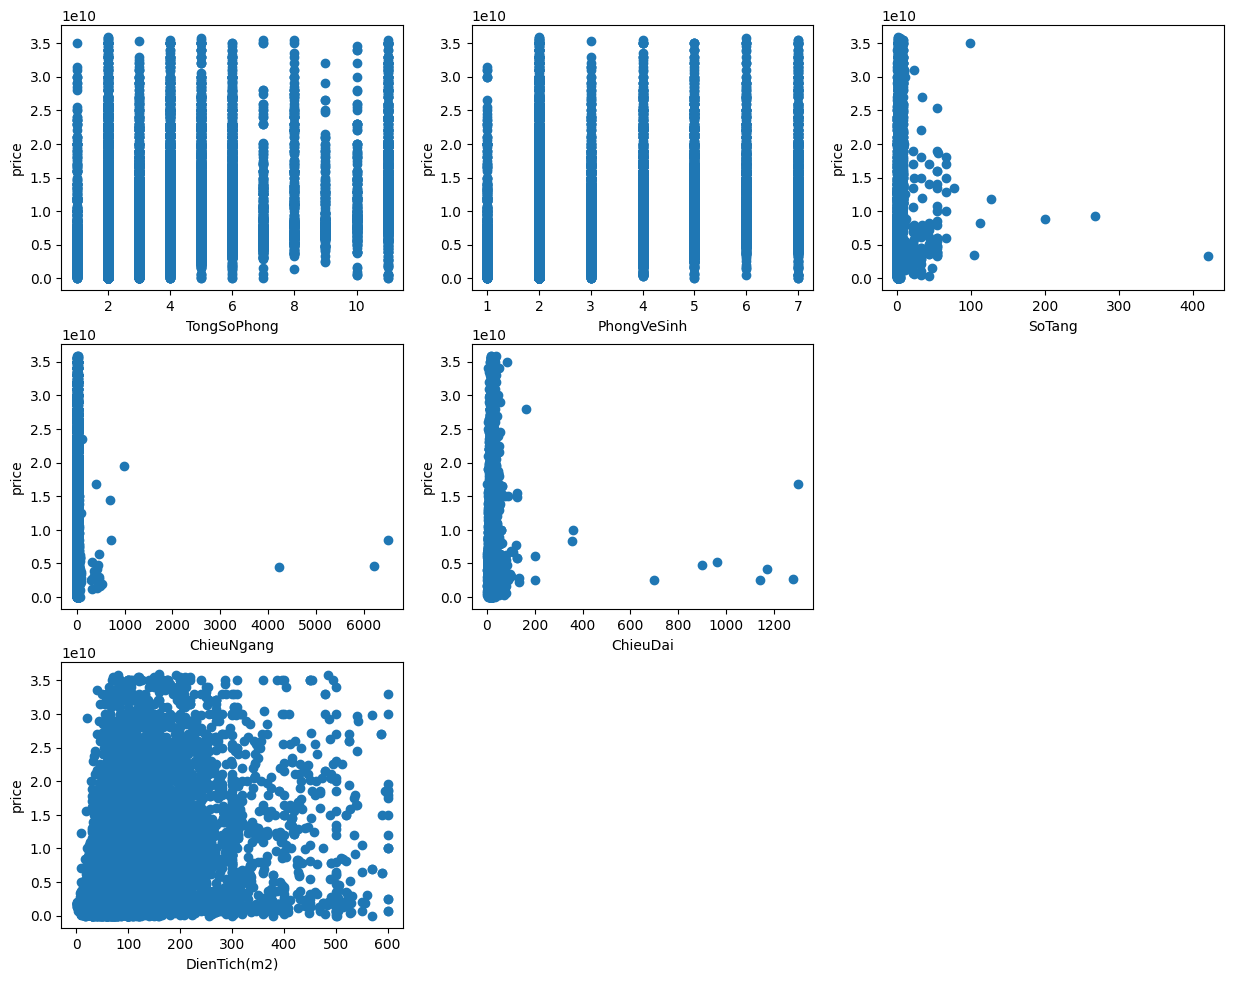

In [535]:
plt.figure(figsize=(15,20))
scatt('TongSoPhong',1)
scatt('PhongVeSinh',2)
scatt('SoTang',3)
scatt('ChieuNgang',4)
scatt('ChieuDai',5)
# scatt('DienTichSuDung',6)
scatt('DienTich(m2)',7)

In [506]:
df_c.select_dtypes(['object']).describe()

,TheLoai,Huyen,Tinh,GiayTo,LoaiHinhNhaO,LoaiHinhDat,NoiThat,LoaiHinhVanPhong,TenDuongCuThe,HuongCuaChinh,LoaiHinhCanHo,TinhTrangBds,SoDuong,TenPhanKhu/Lo/Block/Thap,HuongBanCong,MaLo,DacDiemCanHoChungCu
count,40854,40853,40854,39074,26542,7629,18543,487,5255,11181,6195,6195,5351,2100,1650,1583,1162
unique,5,59,3,6,4,4,4,4,1413,8,6,2,2650,1273,8,822,1
top,Nhà ở,Thành phố Thủ Đức,Tp Hồ Chí Minh,Đã có sổ,Nhà phố liền kề,Đất thổ cư,Noi That đầy đủ,Mặt bằng kinh doanh,"Xã Đa Tốn, Kiêu Kỵ, Dương Xá và một phần thị t...",Đông Nam,Chung cư,Đã bàn giao,số 88,A,Đông Nam,1,Căn góc
freq,26542,3337,19798,33006,17279,6554,9035,384,377,2357,5517,4892,150,152,616,83,1162


In [507]:
df_c.describe()

,Gia,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang,DienTichSuDung,TangSo
count,40854.000,32737.000,40853.000,23631.000,20391.000,24591.000,18388.000,14818.000,1190.000
mean,7894028777.749,3.546,129.764,15.464,19.300,3.128,3.702,140.972,10.951
std,23489169657.314,2.048,1732.623,922.677,147.507,1.598,5.375,174.649,9.047
min,400000.000,1.000,1.000,1.200,1.000,1.000,1.000,1.000,1.000
25%,2700000000.000,2.000,45.000,4.000,11.000,2.000,2.000,50.000,4.000
50%,4500000000.000,3.000,64.000,4.800,15.000,3.000,3.000,96.000,9.000
75%,7500000000.000,4.000,95.000,5.401,20.000,4.000,5.000,180.000,15.000
max,999999999999.000,11.000,260000.000,120797.000,13947.000,7.000,421.000,7000.000,110.000


In [522]:
perce_null = df_c.isna().sum()*100/df_c.shape[0]
df_c= df_c.drop(columns=  perce_null[perce_null.values > 55].index )
# perce_null

In [523]:
df_c.isna().sum() 

TheLoai             0
Huyen               1
Tinh                0
Gia                 0
TongSoPhong      8117
GiayTo           1780
DienTich(m2)        1
LoaiHinhNhaO    14312
ChieuNgang      17223
ChieuDai        20463
PhongVeSinh     16263
SoTang          22466
NoiThat         22311
dtype: int64

#### FIll catefory and numeric misssing value


In [524]:
# Fill the missing values with mean values
for column in [
'ChieuNgang',
'ChieuDai',
'DienTich(m2)'
]:
    df_c[column].fillna(value=df_c[column].mean(),inplace=True)

In [525]:
for column in [
'TongSoPhong',
'Huyen',
'GiayTo',
'LoaiHinhNhaO',
'PhongVeSinh',
'NoiThat',
'PhongVeSinh',
'SoTang',

]:
    df_c[column].fillna(value=df_c[column].mode()[0],inplace=True)

In [526]:
q3_gia=df_c['Gia'].quantile(0.98)
df_c = df_c[(df_c['Gia'] < q3_gia)]

In [527]:
df_c.shape

(40028, 13)

In [528]:
q3=df_c['DienTich(m2)'].quantile(0.99)
df_c= df_c[df_c['DienTich(m2)'] <=q3]

In [529]:
df_c.shape

(39629, 13)

In [530]:
df_c = df_c[df_c['ChieuNgang'] <= 60000]

In [531]:
df_c = df_c[df_c['ChieuDai'] <= 2000]

In [532]:
df_c.isna().sum()*100/df_c.shape[0]
# fr.shape

TheLoai        0.000
Huyen          0.000
Tinh           0.000
Gia            0.000
TongSoPhong    0.000
GiayTo         0.000
DienTich(m2)   0.000
LoaiHinhNhaO   0.000
ChieuNgang     0.000
ChieuDai       0.000
PhongVeSinh    0.000
SoTang         0.000
NoiThat        0.000
dtype: float64

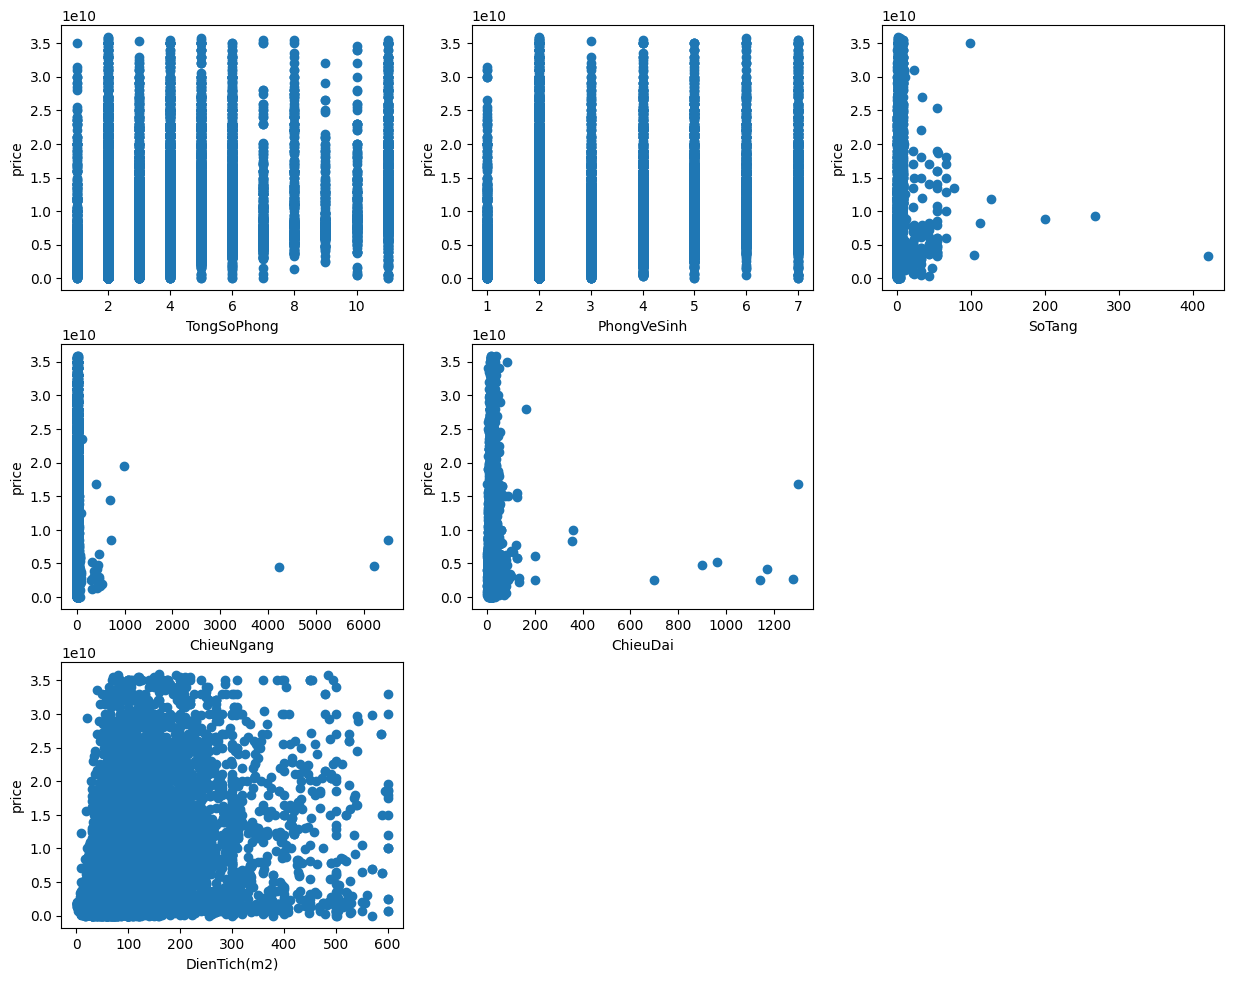

In [403]:
plt.figure(figsize=(15,20))
scatt('TongSoPhong',1)
scatt('PhongVeSinh',2)
scatt('SoTang',3)
scatt('ChieuNgang',4)
scatt('ChieuDai',5)
# scatt('DienTichSuDung',6)
scatt('DienTich(m2)',7)

In [536]:
df_c2=df_c.copy()

In [537]:
df_c2['Gia']= df_c2['Gia']/24000

In [538]:
def barfunction(tinh):
    if tinh!='':
        df_tinh= df_c2[df_c2['Tinh']==tinh]
        frame = df_tinh.copy()
    else :
        frame =df_c2.copy()
    k = frame.groupby('Huyen')['Gia'].mean().reset_index(name='avg_price')
    frame = frame.merge(k,how='inner',on='Huyen')
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=80)
    plt.ylabel('USD')
    plt.bar(x='Huyen', height = 'avg_price', 
    data=frame)
    # plt.ticklabel_format(style='plain',axis='y')


<BarContainer object of 39624 artists>

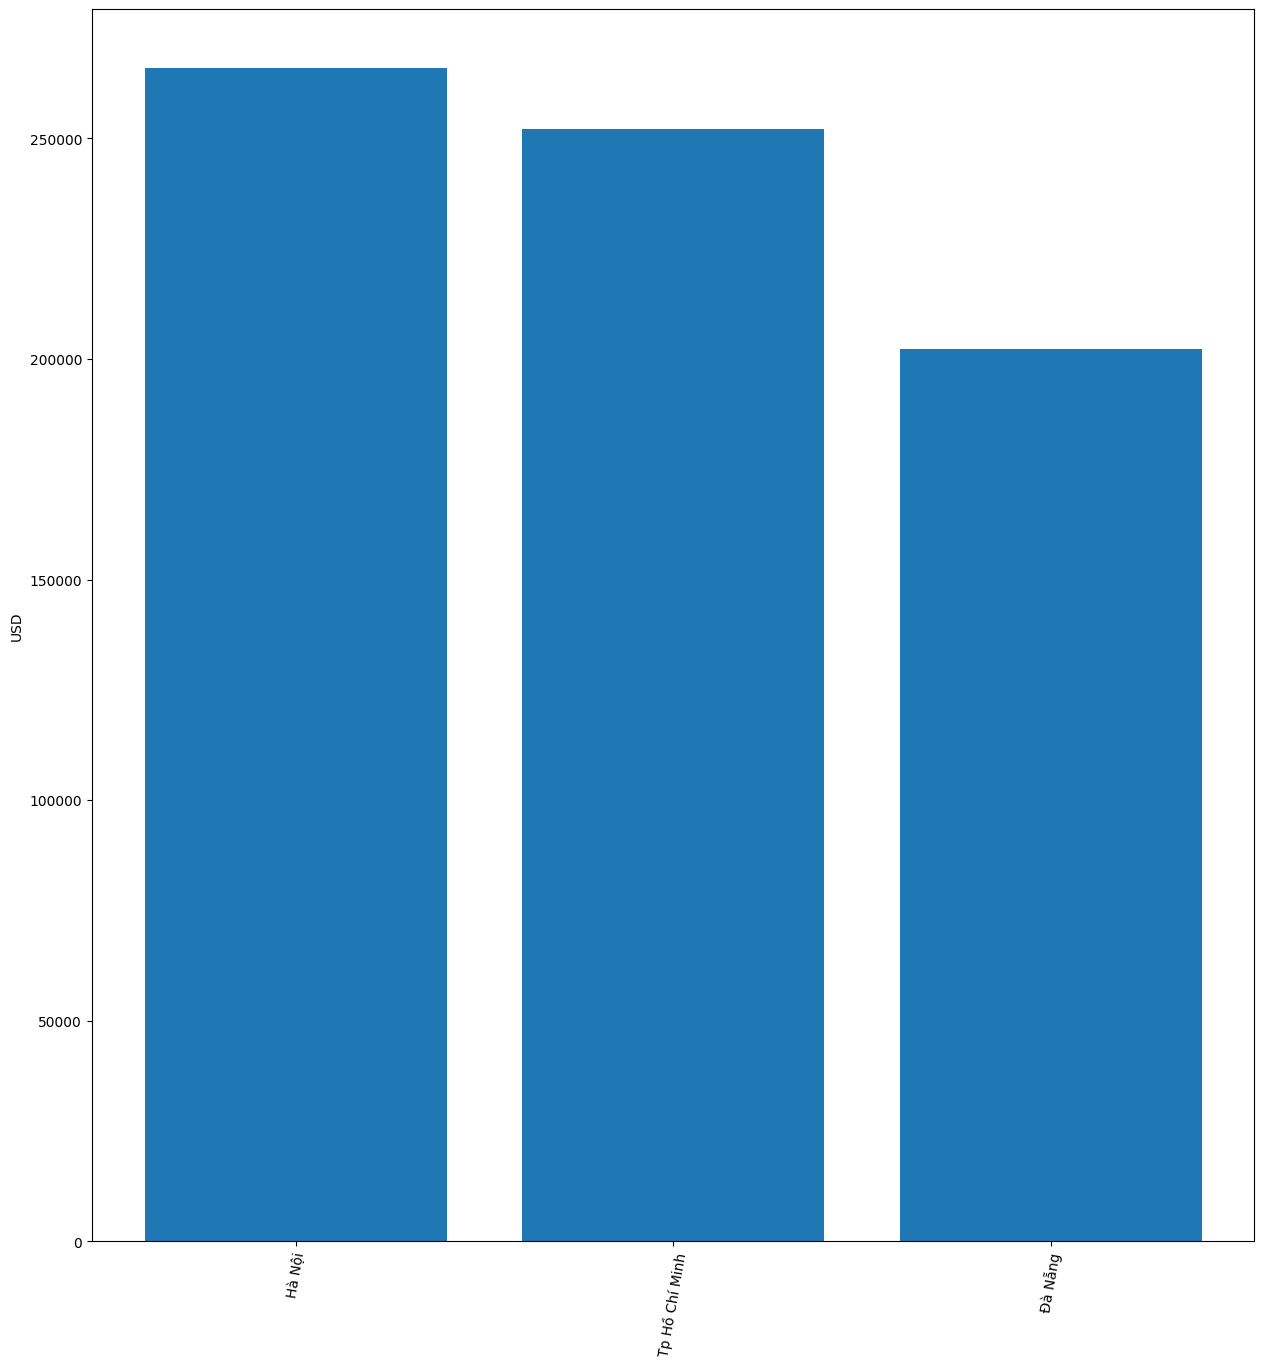

In [539]:
frame =df_c2.copy()
k = frame.groupby('Tinh')['Gia'].mean().reset_index(name='avg_price')
frame = frame.merge(k,how='inner',on='Tinh')
plt.figure(figsize=(15,16))
plt.xticks(rotation=80)
plt.ylabel('USD')
plt.bar(x='Tinh', height = 'avg_price', data=frame)
    # plt.ticklabel_format(style='plain',axis='y')

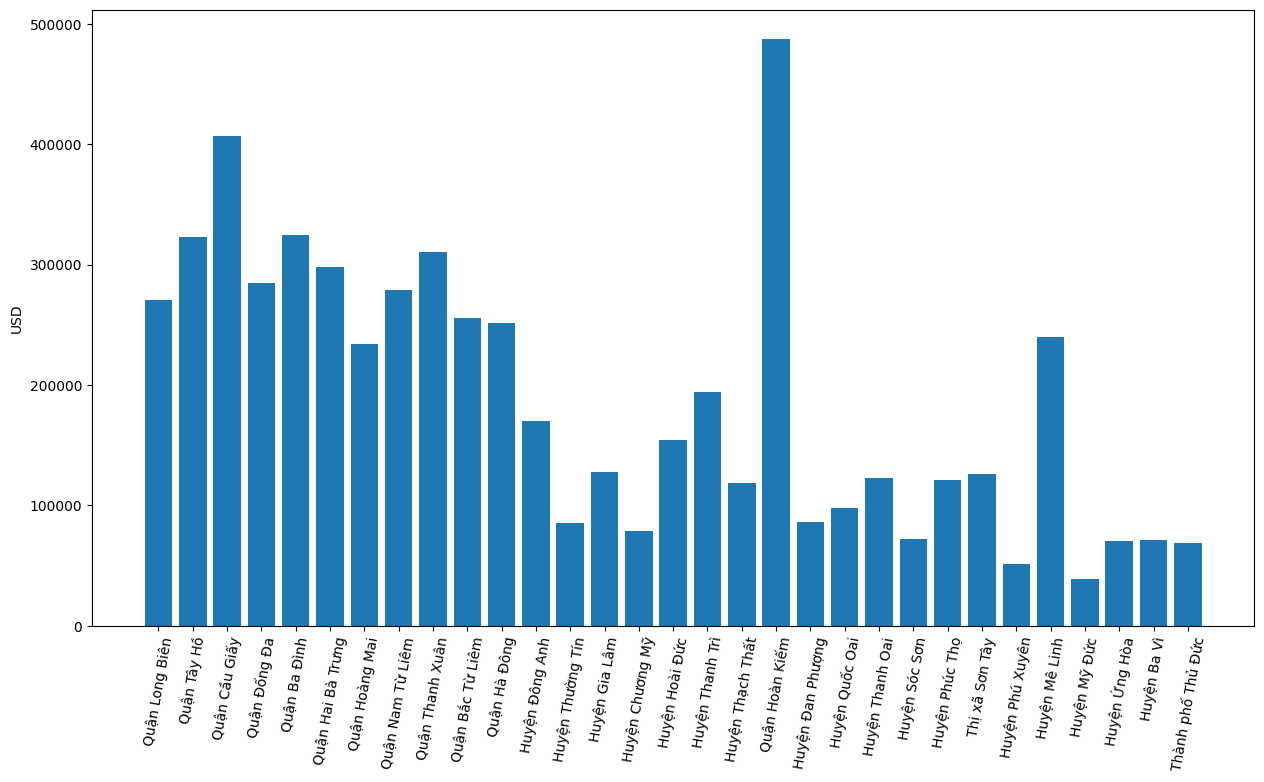

In [540]:
barfunction('Hà Nội')



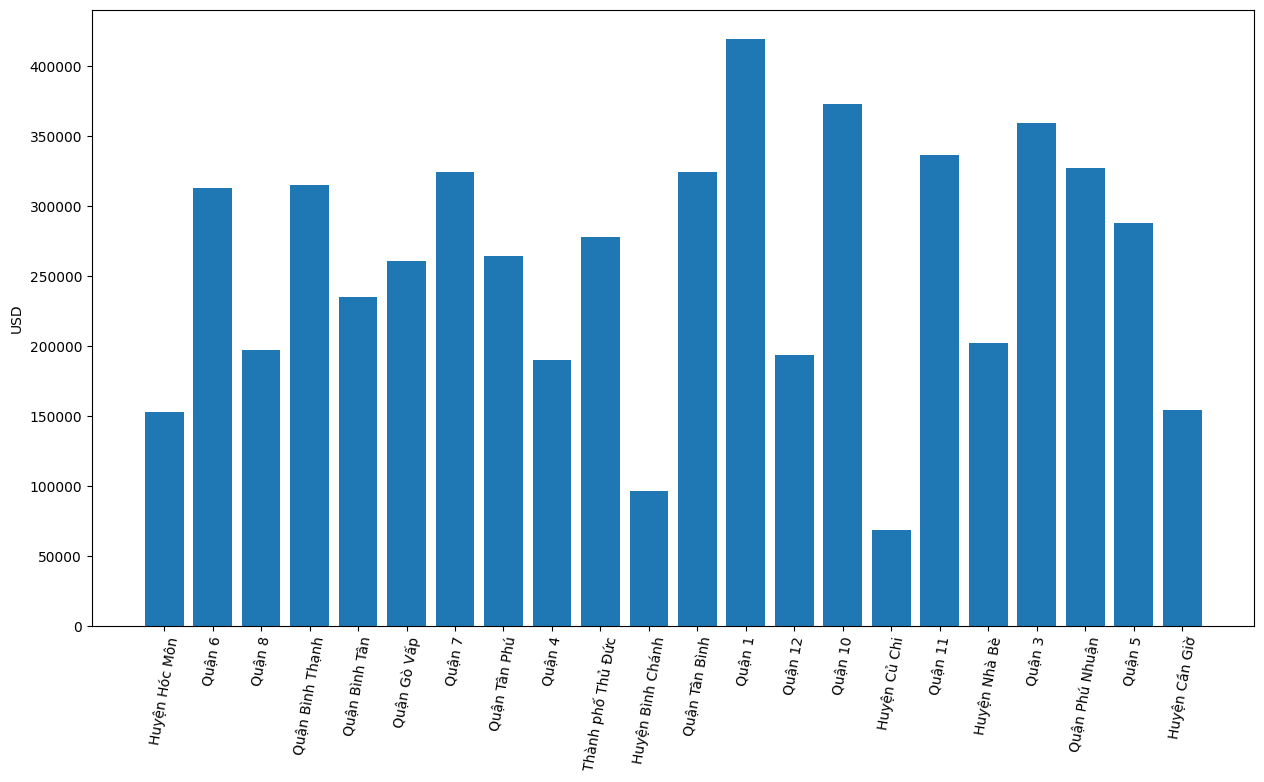

In [543]:
barfunction('Tp Hồ Chí Minh')


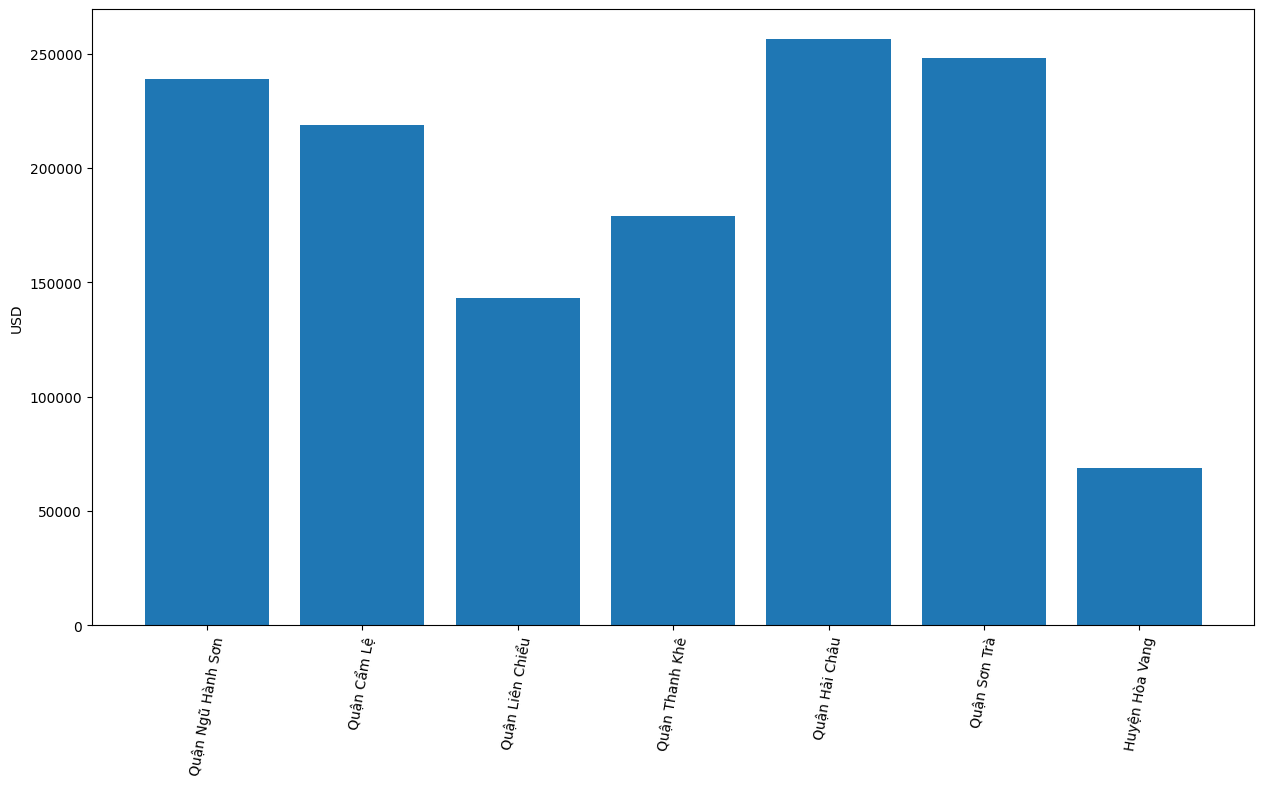

In [544]:
barfunction('Đà Nẵng')

In [13]:
# TheLoai	Huyen	Tinh	GiayTo	LoaiHinhNhaO	NoiThat

In [545]:
def analysis(catrgorial):
    frame=df_c2.copy()
    k = frame.groupby(catrgorial)['Gia'].mean().reset_index(name='avg_price')
    frame = frame.merge(k,how='inner',on=catrgorial)
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=80)
    plt.ylabel('USD')
    plt.bar(x=catrgorial, height = 'avg_price', data=frame)

<Figure size 1500x1600 with 0 Axes>

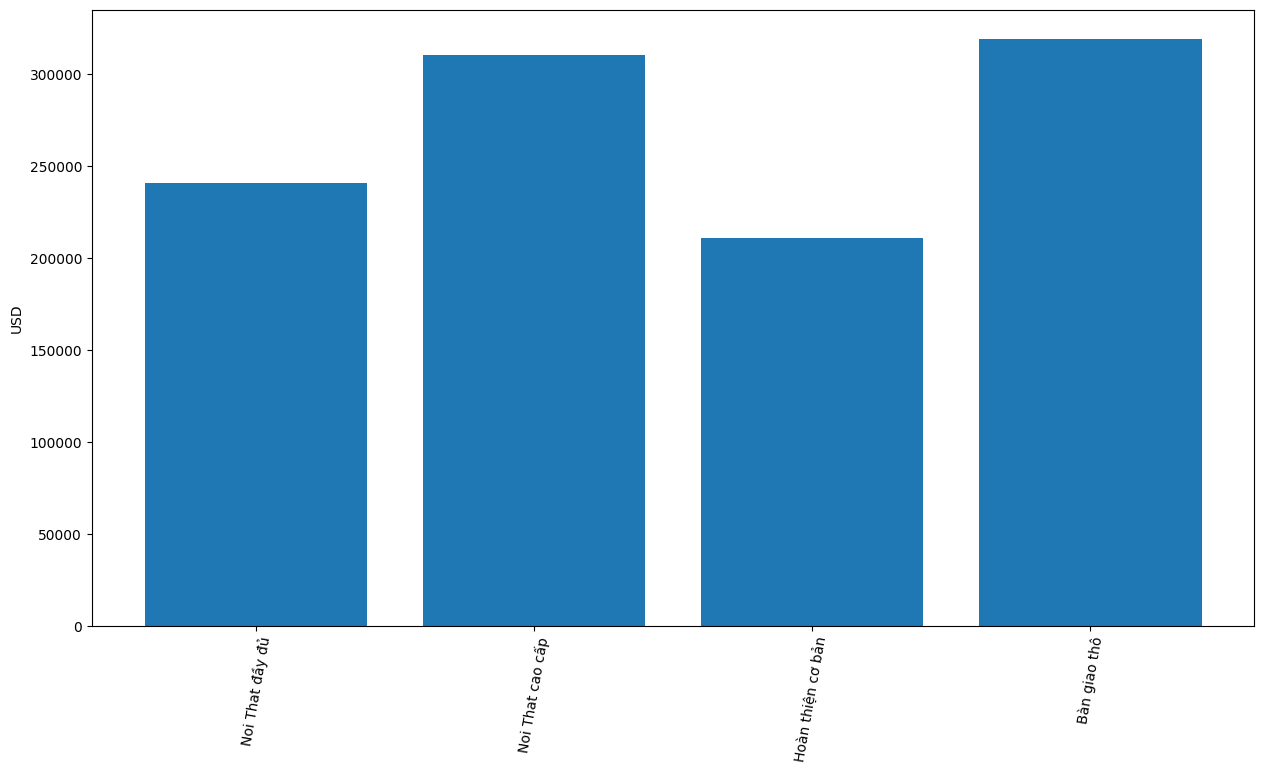

In [546]:
plt.figure(figsize=(15,16))
analysis('NoiThat')

<Figure size 1500x1600 with 0 Axes>

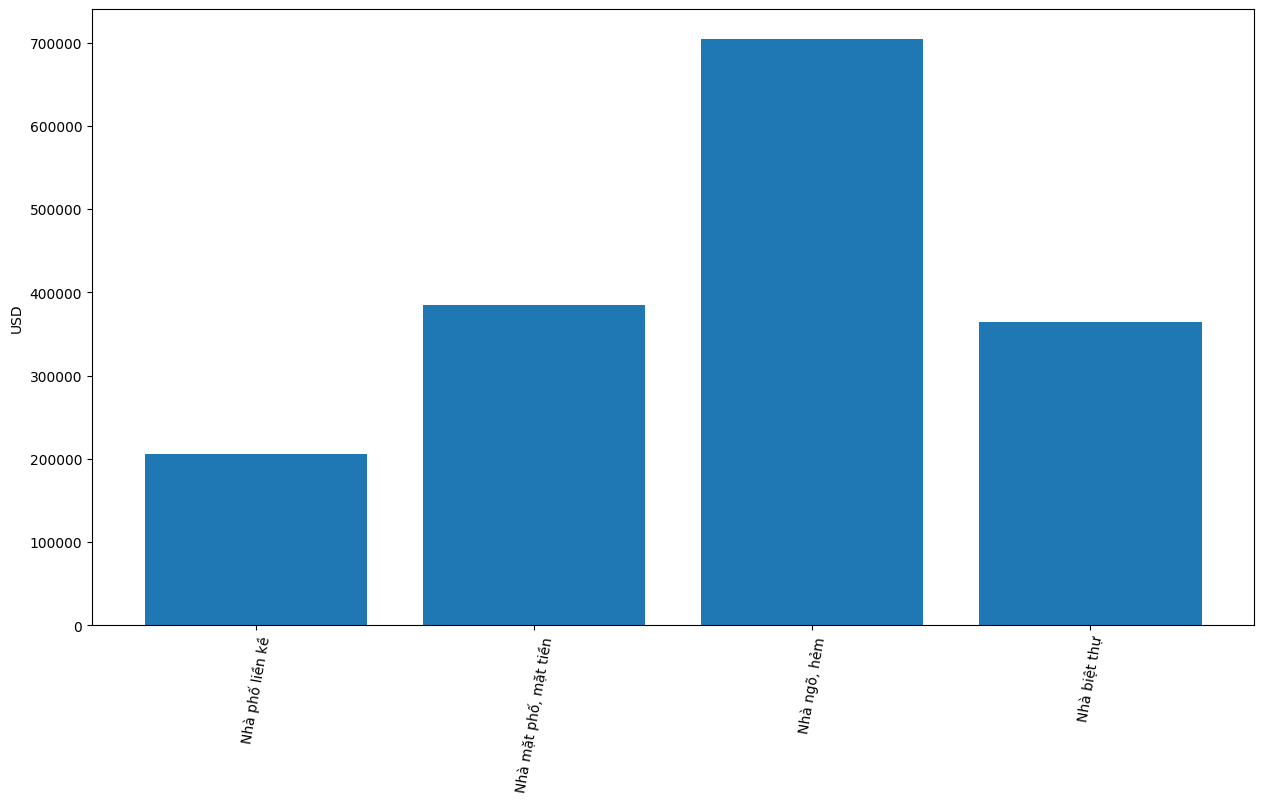

In [547]:
plt.figure(figsize=(15,16))
analysis('LoaiHinhNhaO')

<Figure size 1500x1600 with 0 Axes>

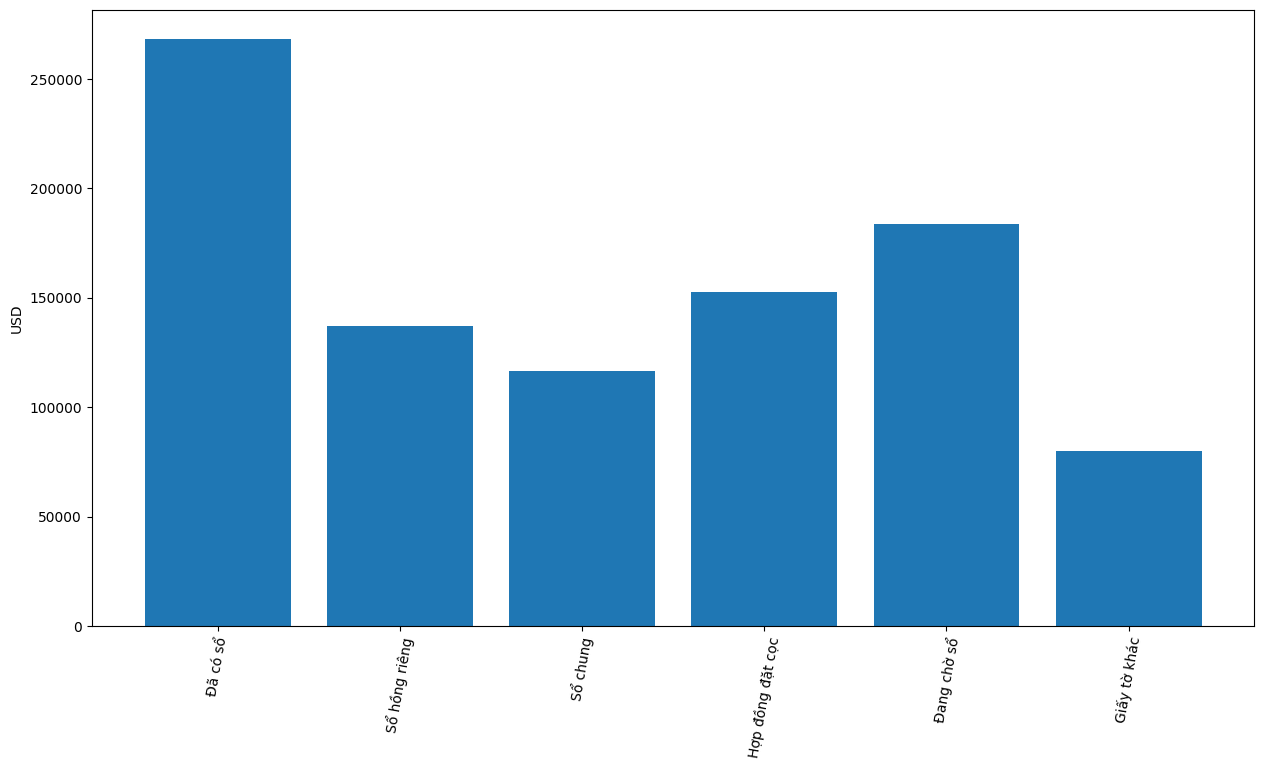

In [548]:
plt.figure(figsize=(15,16))
analysis('GiayTo')

In [ ]:
# TongSoPhong	DienTich(m2)	ChieuNgang	ChieuDai	PhongVeSinh	SoTang	DienTichSuDung	TangSo
# TheLoai	Huyen	Tinh	GiayTo	LoaiHinhNhaO	NoiThat

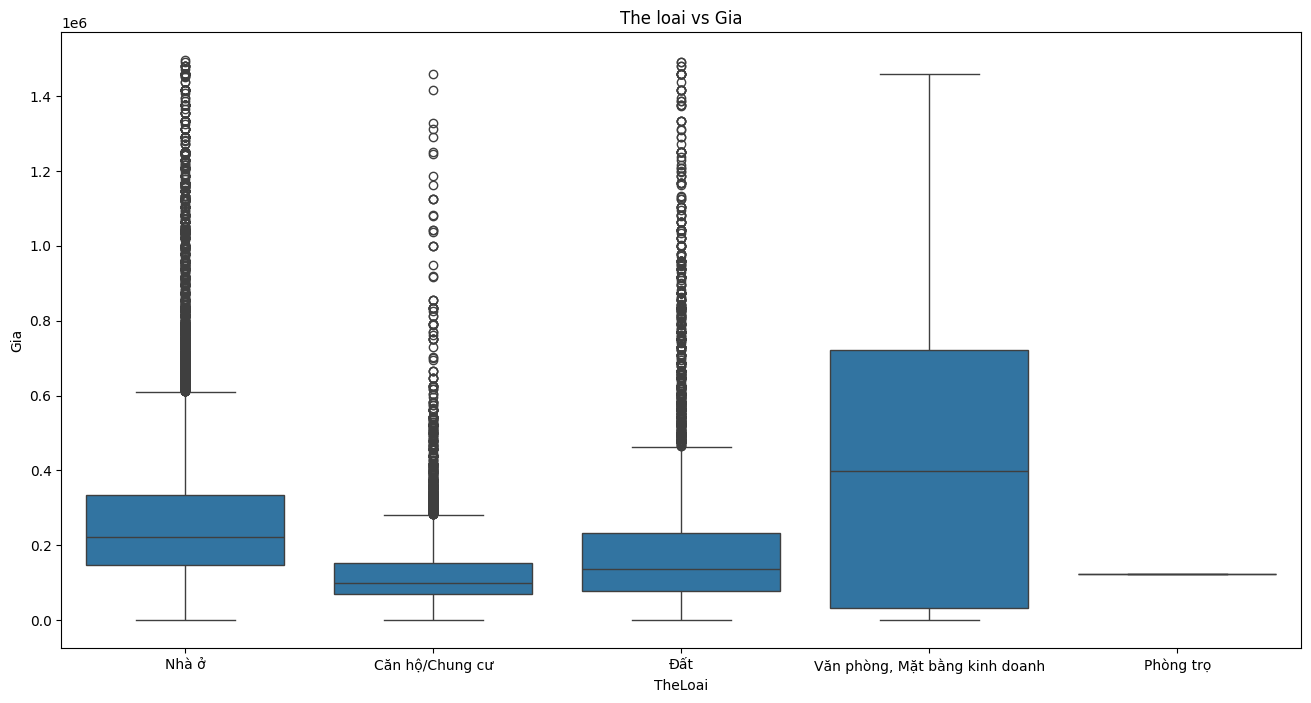

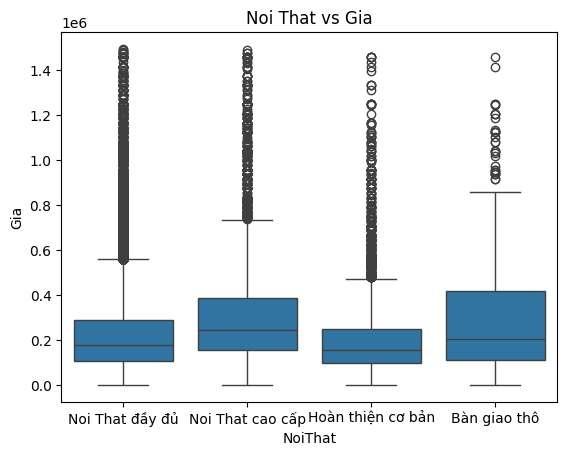

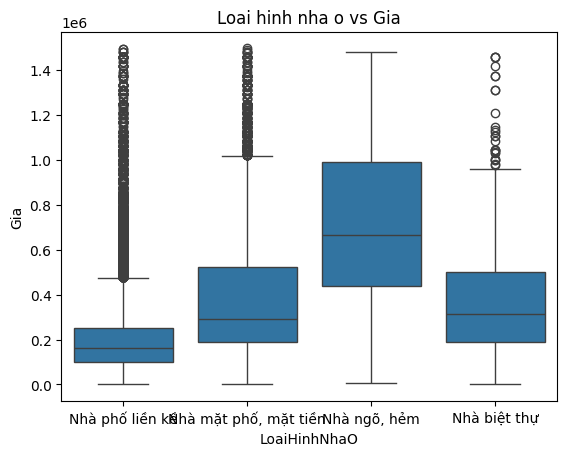

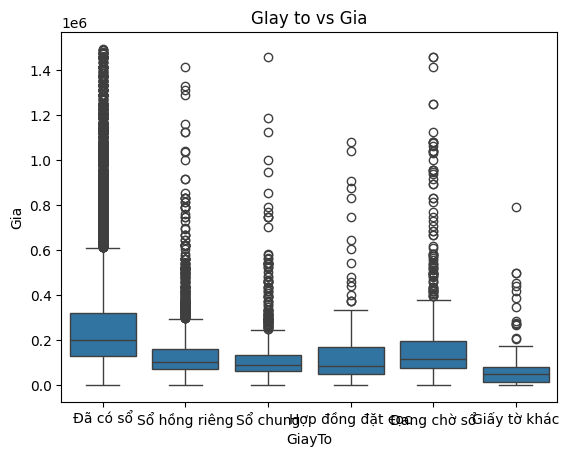

In [556]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_c2,x='TheLoai',y='Gia')
plt.title('The loai vs Gia')
plt.show()

sns.boxplot(data=df_c2,x='NoiThat',y='Gia')
plt.title('Noi That vs Gia')
plt.show()

sns.boxplot(data=df_c2,x='LoaiHinhNhaO',y='Gia')
plt.title('Loai hinh nha o vs Gia')
plt.show()

sns.boxplot(data=df_c2,x='GiayTo',y='Gia')
plt.title('GIay to vs Gia')
plt.show()

In [560]:
df_c2.describe(include='float64')

,Gia,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang
count,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000
mean,248208.847037,3.212447,76.157684,10.273270,17.786201,2.669670,2.760524
std,219691.483173,1.879933,57.499088,51.339216,15.428878,1.340078,3.718995
min,16.666667,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000
25%,110416.666667,2.000000,44.000000,4.300000,15.000000,2.000000,2.000000
50%,187500.000000,3.000000,62.000000,6.734950,19.299993,2.000000,2.000000
75%,295833.333333,4.000000,90.000000,15.464205,19.299993,3.000000,3.000000
max,1495833.333333,11.000000,600.000000,6500.000000,1300.000000,7.000000,421.000000


In [226]:
df_c2.isnull().sum()


TheLoai           0
Huyen             0
Tinh              0
Gia               0
TongSoPhong       0
GiayTo            0
DienTich(m2)      0
LoaiHinhNhaO      0
ChieuNgang        0
ChieuDai          0
PhongVeSinh       0
SoTang            0
NoiThat           0
DienTichSuDung    0
dtype: int64

<Axes: xlabel='Gia', ylabel='Count'>

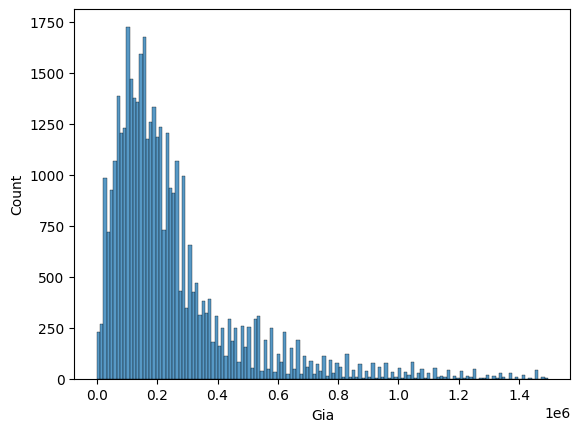

In [559]:
sns.histplot(data=df_c2,x='Gia')

In [30]:
perce_null2 = df_c2.isna().sum()*100/df_raw.shape[0]
perce_null2


TheLoai         0.000
Huyen           0.000
Tinh            0.000
Gia             0.000
TongSoPhong    11.384
GiayTo          0.000
DienTich(m2)    0.000
LoaiHinhNhaO    0.000
ChieuNgang      0.000
ChieuDai        0.000
PhongVeSinh    15.937
dtype: float64

In [636]:
df_c2[df_c2['Gia'] > 1490416]
df_c2.drop([4880],inplace=True)

In [637]:
df_x=df_c2.drop(columns=['Gia'])
df_y=df_c2['Gia']

#### Feature Transformations¶


In [638]:
pd.set_option('display.float_format', '{:.2f}'.format)
skew_df = pd.DataFrame(df_x.select_dtypes(np.number).columns,columns=['Feature'])
# skew_df.drop(index=(0),inplace=True)
skew_df['skew']= skew_df['Feature'].apply(lambda x: scipy.stats.skew(df_x[x]))
skew_df['abs_skew']= skew_df['skew'].apply( lambda x : abs(x) )
skew_df['skewed']= skew_df['abs_skew'].apply(lambda x:  True if x >0.5 else False)
skew_df

,Feature,skew,abs_skew,skewed
0,TongSoPhong,2.29,2.29,True
1,DienTich(m2),3.66,3.66,True
2,ChieuNgang,110.13,110.13,True
3,ChieuDai,61.94,61.94,True
4,PhongVeSinh,1.58,1.58,True
5,SoTang,54.94,54.94,True


In [639]:
type(skew_df[skew_df['Feature'] == 'Gia'] )

pandas.core.frame.DataFrame

In [640]:
for i in skew_df['Feature']:
   if skew_df.loc[skew_df['Feature'] == i ,'skewed'].values == True:
      df_x[i] = df_x[i].apply(lambda x: np.log(x))


In [641]:
df4= df_x.copy()

#### Encode Categoricals¶

In [642]:
df4 = pd.get_dummies(data=df_x).astype(float)

In [643]:
df5=df4.copy()

In [644]:
df5.head()

,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang,TheLoai_Căn hộ/Chung cư,TheLoai_Nhà ở,TheLoai_Phòng trọ,"TheLoai_Văn phòng, Mặt bằng kinh doanh",TheLoai_Đất,Huyen_Huyện Ba Vì,Huyen_Huyện Bình Chánh,Huyen_Huyện Chương Mỹ,Huyen_Huyện Cần Giờ,Huyen_Huyện Củ Chi,Huyen_Huyện Gia Lâm,Huyen_Huyện Hoài Đức,Huyen_Huyện Hòa Vang,Huyen_Huyện Hóc Môn,Huyen_Huyện Mê Linh,Huyen_Huyện Mỹ Đức,Huyen_Huyện Nhà Bè,Huyen_Huyện Phú Xuyên,Huyen_Huyện Phúc Thọ,Huyen_Huyện Quốc Oai,Huyen_Huyện Sóc Sơn,Huyen_Huyện Thanh Oai,Huyen_Huyện Thanh Trì,Huyen_Huyện Thường Tín,Huyen_Huyện Thạch Thất,Huyen_Huyện Đan Phượng,Huyen_Huyện Đông Anh,Huyen_Huyện Ứng Hòa,Huyen_Quận 1,Huyen_Quận 10,Huyen_Quận 11,Huyen_Quận 12,Huyen_Quận 3,Huyen_Quận 4,Huyen_Quận 5,Huyen_Quận 6,Huyen_Quận 7,Huyen_Quận 8,Huyen_Quận Ba Đình,Huyen_Quận Bình Thạnh,Huyen_Quận Bình Tân,Huyen_Quận Bắc Từ Liêm,Huyen_Quận Cầu Giấy,Huyen_Quận Cẩm Lệ,Huyen_Quận Gò Vấp,Huyen_Quận Hai Bà Trưng,Huyen_Quận Hoàn Kiếm,Huyen_Quận Hoàng Mai,Huyen_Quận Hà Đông,Huyen_Quận Hải Châu,Huyen_Quận Liên Chiểu,Huyen_Quận Long Biên,Huyen_Quận Nam Từ Liêm,Huyen_Quận Ngũ Hành Sơn,Huyen_Quận Phú Nhuận,Huyen_Quận Sơn Trà,Huyen_Quận Thanh Khê,Huyen_Quận Thanh Xuân,Huyen_Quận Tân Bình,Huyen_Quận Tân Phú,Huyen_Quận Tây Hồ,Huyen_Quận Đống Đa,Huyen_Thành phố Thủ Đức,Huyen_Thị xã Sơn Tây,Tinh_Hà Nội,Tinh_Tp Hồ Chí Minh,Tinh_Đà Nẵng,GiayTo_Giấy tờ khác,GiayTo_Hợp đồng đặt cọc,GiayTo_Sổ chung,GiayTo_Sổ hồng riêng,GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,LoaiHinhNhaO_Nhà biệt thự,"LoaiHinhNhaO_Nhà mặt phố, mặt tiền","LoaiHinhNhaO_Nhà ngõ, hẻm",LoaiHinhNhaO_Nhà phố liền kề,NoiThat_Bàn giao thô,NoiThat_Hoàn thiện cơ bản,NoiThat_Noi That cao cấp,NoiThat_Noi That đầy đủ
0,1.39,3.64,1.39,2.25,1.39,1.39,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,2.40,4.98,2.74,2.96,0.69,2.08,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
2,1.39,3.53,2.74,2.96,1.39,1.79,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,1.10,4.50,2.74,2.96,0.69,0.69,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,1.39,4.01,2.74,2.96,1.10,1.39,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


#### Scaling 


In [645]:
pd.set_option('display.float_format', '{:.8f}'.format)
scalar = StandardScaler()
scaled = scalar.fit(df5)
data_preprocessing = scaled.transform(df5)
df5 = pd.DataFrame(data=data_preprocessing,index=df5.index, columns=df5.columns)
df5

,TongSoPhong,DienTich(m2),ChieuNgang,ChieuDai,PhongVeSinh,SoTang,TheLoai_Căn hộ/Chung cư,TheLoai_Nhà ở,TheLoai_Phòng trọ,"TheLoai_Văn phòng, Mặt bằng kinh doanh",TheLoai_Đất,Huyen_Huyện Ba Vì,Huyen_Huyện Bình Chánh,Huyen_Huyện Chương Mỹ,Huyen_Huyện Cần Giờ,Huyen_Huyện Củ Chi,Huyen_Huyện Gia Lâm,Huyen_Huyện Hoài Đức,Huyen_Huyện Hòa Vang,Huyen_Huyện Hóc Môn,Huyen_Huyện Mê Linh,Huyen_Huyện Mỹ Đức,Huyen_Huyện Nhà Bè,Huyen_Huyện Phú Xuyên,Huyen_Huyện Phúc Thọ,Huyen_Huyện Quốc Oai,Huyen_Huyện Sóc Sơn,Huyen_Huyện Thanh Oai,Huyen_Huyện Thanh Trì,Huyen_Huyện Thường Tín,Huyen_Huyện Thạch Thất,Huyen_Huyện Đan Phượng,Huyen_Huyện Đông Anh,Huyen_Huyện Ứng Hòa,Huyen_Quận 1,Huyen_Quận 10,Huyen_Quận 11,Huyen_Quận 12,Huyen_Quận 3,Huyen_Quận 4,Huyen_Quận 5,Huyen_Quận 6,Huyen_Quận 7,Huyen_Quận 8,Huyen_Quận Ba Đình,Huyen_Quận Bình Thạnh,Huyen_Quận Bình Tân,Huyen_Quận Bắc Từ Liêm,Huyen_Quận Cầu Giấy,Huyen_Quận Cẩm Lệ,Huyen_Quận Gò Vấp,Huyen_Quận Hai Bà Trưng,Huyen_Quận Hoàn Kiếm,Huyen_Quận Hoàng Mai,Huyen_Quận Hà Đông,Huyen_Quận Hải Châu,Huyen_Quận Liên Chiểu,Huyen_Quận Long Biên,Huyen_Quận Nam Từ Liêm,Huyen_Quận Ngũ Hành Sơn,Huyen_Quận Phú Nhuận,Huyen_Quận Sơn Trà,Huyen_Quận Thanh Khê,Huyen_Quận Thanh Xuân,Huyen_Quận Tân Bình,Huyen_Quận Tân Phú,Huyen_Quận Tây Hồ,Huyen_Quận Đống Đa,Huyen_Thành phố Thủ Đức,Huyen_Thị xã Sơn Tây,Tinh_Hà Nội,Tinh_Tp Hồ Chí Minh,Tinh_Đà Nẵng,GiayTo_Giấy tờ khác,GiayTo_Hợp đồng đặt cọc,GiayTo_Sổ chung,GiayTo_Sổ hồng riêng,GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,LoaiHinhNhaO_Nhà biệt thự,"LoaiHinhNhaO_Nhà mặt phố, mặt tiền","LoaiHinhNhaO_Nhà ngõ, hẻm",LoaiHinhNhaO_Nhà phố liền kề,NoiThat_Bàn giao thô,NoiThat_Hoàn thiện cơ bản,NoiThat_Noi That cao cấp,NoiThat_Noi That đầy đủ
0,0.72049527,-0.87017238,-1.08296414,-1.64732615,1.15489563,1.14806199,-0.42946230,0.72462129,-0.00502379,-0.09866467,-0.46679238,-0.00710481,-0.15681657,-0.04771351,-0.02659248,-0.10956363,-0.12209588,-0.09575457,-0.11259071,-0.13623485,-0.02706352,-0.02190319,-0.12608019,-0.02071782,-0.01588844,-0.05715172,-0.03554557,-0.03625043,-0.08879996,-0.07351680,-0.05602963,-0.01811629,-0.09206215,-0.01329272,-0.08000406,-0.10548051,-0.07032584,-0.22744953,-0.08792969,-0.07839066,-0.06226044,-0.09399421,-0.17458623,-0.14418875,-0.13823922,-0.17542872,-0.21611231,-0.11565448,-0.18270984,-0.18048542,-0.20143140,-0.14582175,-0.03958788,-0.21198560,-0.17055393,-0.14464406,-0.18432620,6.35636246,-0.15537448,-0.18788283,-0.10375467,-0.15941587,-0.13584996,-0.15899922,-0.16181338,-0.18694495,-0.11293502,-0.20679799,-0.29585154,-0.02190319,1.38258061,-0.96485513,-0.45963903,-0.06123078,-0.06347431,-0.20446467,-0.30355301,-0.14179951,0.42330339,-0.16587385,-0.47383482,-0.10572486,0.53291784,-0.10200089,-0.32169795,-0.38681484,0.55306387
1,2.83606551,1.41863543,1.03806043,0.41574746,-0.42353026,2.73402999,-0.42946230,0.72462129,-0.00502379,-0.09866467,-0.46679238,-0.00710481,-0.15681657,-0.04771351,-0.02659248,-0.10956363,-0.12209588,-0.09575457,-0.11259071,-0.13623485,-0.02706352,-0.02190319,-0.12608019,-0.02071782,-0.01588844,-0.05715172,-0.03554557,-0.03625043,-0.08879996,-0.07351680,-0.05602963,-0.01811629,-0.09206215,-0.01329272,-0.08000406,-0.10548051,-0.07032584,-0.22744953,-0.08792969,-0.07839066,-0.06226044,-0.09399421,-0.17458623,-0.14418875,-0.13823922,-0.17542872,-0.21611231,-0.11565448,-0.18270984,-0.18048542,-0.20143140,-0.14582175,-0.03958788,-0.21198560,-0.17055393,-0.14464406,-0.18432620,-0.15732268,-0.15537448,-0.18788283,-0.10375467,-0.15941587,-0.13584996,-0.15899922,-0.16181338,-0.18694495,8.85464904,-0.20679799,-0.29585154,-0.02190319,1.38258061,-0.96485513,-0.45963903,-0.06123078,-0.06347431,-0.20446467,-0.30355301,-0.14179951,0.42330339,-0.16587385,2.11044008,-0.10572486,-1.87646185,-0.10200089,-0.32169795,-0.38681484,0.55306387
2,0.72049527,-1.05930331,1.03806043,0.41574746,1.15489563,2.07579380,-0.42946230,0.72462129,-0.00502379,-0.09866467,-0.46679238,-0.00710481,-0.15681657,-0.04771351,-0.02659248,-0.10956363,-0.12209588,-0.09575457,-0.11259071,-

In [46]:
# df_y = df_y.apply(lambda x: x/25000)
# df_y

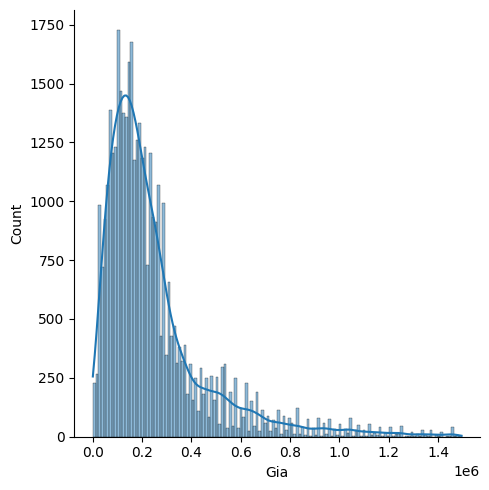

In [646]:
sns.displot(data=df_y,kde=True)


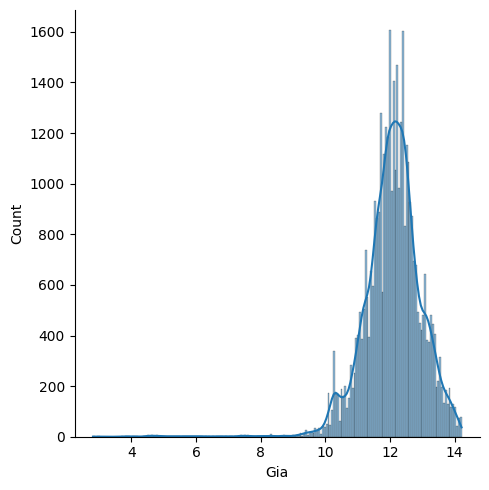

In [647]:
k = df_y.apply(lambda x: np.log(x))
sns.displot(data=k,kde=True)


Train and Evaluate

In [648]:
x_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df5, k, test_size=0.2, random_state=105)
model = LinearRegression()
model.fit(x_train_lr,y_train_lr)
y_predictlr= model.predict(X_test_lr)



In [649]:
y_predictlr

array([11.90707743, 12.38438284, 12.53587592, ..., 11.50700819,
       12.05755967, 12.54108018])

Explained variance regression score
Best possible score is 1.0, lower values are worse.

In [651]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print(r2_score(y_test_lr, y_predictlr))
print(explained_variance_score(y_test_lr, y_predictlr))

-3.0380283688779e+22
-3.0376450214496504e+22


In [656]:
scores = cross_val_score(model, df5, k, cv=40, scoring='r2')
print(f"Cross-validated scores: {scores}")
print(f"Mean cross-validated score: {scores.mean()}")

Cross-validated scores: [ 4.59805299e-01  6.14476567e-01  5.08683586e-01  5.85830656e-01
  5.74363347e-01  5.85821055e-01  5.45061362e-01  5.00332518e-01
  5.67317238e-01  5.56810767e-01  5.04298888e-01  6.66951827e-01
 -2.50470344e+22  3.42591923e-01  6.76784908e-01  5.42609725e-01
  6.86507411e-01  6.53207601e-01  6.59759519e-01  5.73936568e-01
  6.22512629e-01  6.57984336e-01  6.85106028e-01  6.62610984e-01
  6.56307721e-01  6.39236462e-01  5.18739843e-01  6.71885814e-01
  6.38343238e-01  6.80500332e-01  5.86458580e-01  5.31375050e-01
  6.27314336e-01  5.33162070e-01  4.93214641e-01  5.31849325e-01
  3.83684987e-01  5.04044373e-01  6.08098512e-01 -2.39425796e+26]
Mean cross-validated score: -5.986271064397944e+24


In [652]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
print(mean_squared_error(np.exp(y_test_lr), np.exp(y_predictlr)))

print(median_absolute_error(np.exp(y_test_lr), np.exp(y_predictlr)))
rmse = mean_squared_error(np.exp(y_test_lr),  np.exp(y_predictlr), squared=False)
rmse


19356774792.093307
41329.54770426736


/home/dell/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


139128.62678864226

In [653]:
(sum((np.exp(y_predictlr) - np.exp(y_test_lr))**2)/len(y_test_lr))**0.5


139128.626788642

In [654]:
perc = np.abs((np.exp(y_predictlr) - np.exp(y_test_lr)))/np.exp(y_test_lr)
perc = perc.values*100
(perc)

array([1.29645303e+02, 5.95178925e+00, 5.05530840e+01, ...,
       8.99317165e+04, 3.77799202e+00, 2.75124080e+00])

In [658]:
df_y.sort_values()

13977        16.66666667
12702        18.75000000
40583        20.83333333
12885        41.66666667
15461        41.66666667
              ...       
222     1479166.66666667
15709   1480416.66666667
4564    1491666.66666667
31328   1491666.66666667
24426   1495833.33333333
Name: Gia, Length: 39623, dtype: float64

In [667]:
data = {'Gia du doan':np.exp(y_predictlr),
        'Gia thuc':np.exp(y_test_lr),
       '% sai lech': perc}
A = pd.DataFrame(data)
B = A.sort_values(by=['% sai lech'])
# print(B.to_string())
# print(B[B < B.quantile(0.99)].describe().to_string()) 
# B= B.drop(index=13106)
# print(A.sort_values(by=['Gia thuc']).to_string())
print(A[A['% sai lech'] > 75].to_string())

           Gia du doan         Gia thuc      % sai lech
9315   148312.59173141   64583.33333333    129.64530333
7494    91596.08759717   29166.66666667    214.04372890
40582   71059.16405024   37500.00000000     89.49110413
40122  405789.98533911  175000.00000000    131.87999162
10669   60477.60931096   31250.00000000     93.52834980
40036  101916.54641707   40833.33333333    149.59154225
30722   12182.41525492   56250.00000000     78.34237288
1824   330862.76038334   68750.00000000    381.25492419
33139  102045.70340310     103.33333333  98653.90651913
15810  256374.35586185  145833.33333333     75.79955831
38072  255634.59734710   93750.00000000    172.67690384
38958  138044.39364776   60416.66666667    128.48727224
26117  110420.13643978   13333.33333333    728.15102330
8402   120083.37442914   35416.66666667    239.05893956
12889  143189.06683535   56250.00000000    154.55834104
8985   157339.23140314  791666.66666667     80.12557077
8519   114320.64907294   29166.66666667    291.9

<!-- Thuat toan reandom forest -->

In [671]:
A['Gia thuc'][A['% sai lech'] > 75].mean()

124273.35101914553

In [690]:
A['MucGia'] = A['Gia thuc'].apply(lambda x: 'Low' if x <=100000  else 'Medium'  if (x > 100000 and x < 400000) else 'High' ) 

<Axes: xlabel='MucGia', ylabel='% sai lech'>

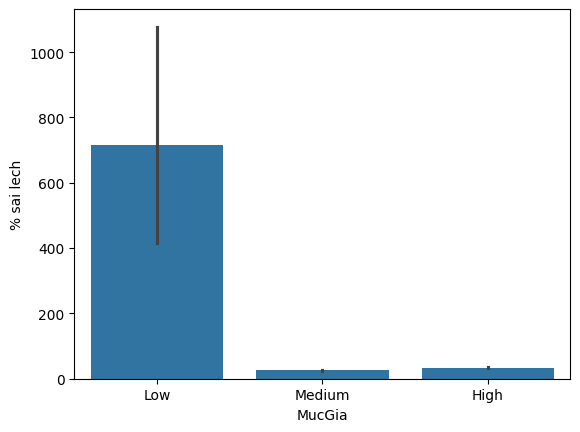

In [691]:
sns.barplot(data=A,x='MucGia',y='% sai lech')

<Axes: xlabel='% sai lech', ylabel='Count'>

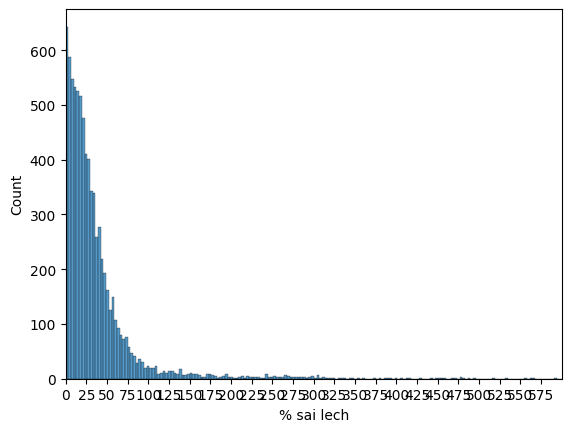

In [681]:
plt.xlim(0,600)
# plt.xticks(np.arange(0, 600, 25))
sns.histplot(data= A[A['% sai lech'] > 0],x='% sai lech')

In [129]:
# df6= df5.copy()

In [130]:
from lightgbm import LGBMRegressor
# from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


In [131]:
# # Replace special characters in column names
# df6.columns = df6.columns.str.replace('[^A-Za-z0-9_]+', '_')
# # Or create a new list of column names
# new_col_names = ['col_{}'.format(i) for i in range(df6.shape[1])]
# df6.columns = new_col_names

In [132]:
# X_train, X_test, y_train, y_test = train_test_split(df6, k, test_size=0.2, random_state=42)


In [133]:
# lightgbm_params = {
#     'num_leaves': 39,
#     'max_depth': 2,
#     'learning_rate': 0.13705339989856127,
#     'n_estimators': 273
# }

In [139]:
model_LGBM=LGBMRegressor(**lightgbm_params)
 


In [ ]:
X_train

In [140]:
model_LGBM.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 11792, number of used features: 60
[LightGBM] [Info] Start training from score 22.350081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(learning_rate=0.13705339989856127, max_depth=2, n_estimators=273,
              num_leaves=39)

In [141]:
y_predict = model.predict(X_test)

In [279]:
mse = mean_squared_error(y_test, y_predict)
np.exp(mse)

1.1981721853966143

In [280]:
perc = np.abs((np.exp(y_predict) - np.exp(y_test)))/np.exp(y_test)
perc = perc.values*100
perc

array([22.51862231, 34.08663623, 21.08856899, ...,  7.46704173,
       60.47278325, 68.77494705])

In [281]:
data = {'Gia du doan':np.exp(y_predict),
        'Gia thuc':np.exp(y_test),
       '% sai lech': perc}
A = pd.DataFrame(data)

In [282]:
B = A.sort_values(by=['% sai lech'])
print(B.to_string())

       Gia du doan    Gia thuc  % sai lech
22838   131988.640  132000.000       0.009
15112    47991.458   48000.000       0.018
12104   235936.041  236000.000       0.027
21260   135953.125  136000.000       0.034
23890    94754.671   94720.000       0.037
28842   175686.634  175600.000       0.049
23140   247835.041  248000.000       0.067
31455   167840.262  168000.000       0.095
21628   141848.731  142000.000       0.107
19555   200293.030  200000.000       0.147
18759   156231.698  156000.000       0.149
24189   239642.380  240000.000       0.149
19403   207579.959  208000.000       0.202
19438   223545.292  224000.000       0.203
23789   300647.846  300000.000       0.216
35182   164363.260  164000.000       0.221
35979   164363.260  164000.000       0.221
22660   115742.940  116000.000       0.222
14487   256591.812  256000.000       0.231
32482    59855.534   60000.000       0.241
16551   260690.506  260000.000       0.266
38498   213412.666  214000.000       0.274
21258   223

In [288]:
B['% sai lech']

22838       0.009
15112       0.018
12104       0.027
21260       0.034
23890       0.037
           ...   
4583      634.370
24338    1925.072
8242     5986.625
26629    8957.028
13893   10729.759
Name: % sai lech, Length: 2949, dtype: float64

In [287]:
(sum((np.exp(model.predict(X_test)) - np.exp(y_test))**2)/len(y_test))**0.5
11

11

In [148]:
results = {}

kf = KFold(n_splits=10)
result = np.exp(np.sqrt(-cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=kf)))
results['modell'] = result

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 13266, number of used features: 59
[LightGBM] [Info] Start training from score 12.206015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [149]:
result

array([1.64029295, 1.50217004, 1.47090484, 1.49183855, 1.48081045,
       1.59498683, 1.53951676, 1.46886445, 1.47666705, 1.77182422])

In [150]:
print(np.mean(result))
print(np.std(result))

1.5437876136390347
0.09369150216799893
